In [2]:
# Imports
#%matplotlib qt
%matplotlib inline

import matplotlib.pyplot as plt
import mne
import os
import numpy as np
import math
from scipy.stats import pearsonr
from matplotlib import cm
import pandas as pd

from fooof import FOOOF
from fooof import FOOOFGroup

# To Do's - master version:

### Plotting
- Figure out how to plot topographies with nan values
    - Use MNE masks to select which channels will be plotted
        - Suggestion: add a check for which channels have data. Boolean select these channels & positions to pass into plotting.
- Reorganize notebook for which parts you have to re run

### Quantitative Corrs
- Set it up to measure correlation & plot scatterplot
    - Generally, for any band, any FOOOF feature 
        - First: set band & feature, run to see results (finish the generalization: get a scatter plot & corr)
        - Also: add to plot Medial -> Lateral (abs)
- Collect all R's into corr matrix
- Bonus: plot the corr matrix as a colored plot (red/blue). Hint: plt.imshow(matrix). Extra bonus: add a colorbar. 
        
### Per subject analysis
- Do the same spatial correlations, per subject, collect distributions of r-vals & p-vals
- Plot: boxplots of the R-values, across subjects

### Band to Band Correlations
- Amplitude-amplitude correlations between bands (across channels)
- Plot: corr-matrix

# Loading information

In [3]:
save_path = 'C:\\Users\\abc\\EEG-MNE\\'
chan_dat = 'channel_dat.txt'

chan_file = os.path.join(save_path, chan_dat)

# DATA SET UP

In [6]:
theta_data = np.load('theta_group.npy')
alpha_data = np.load('alpha_group.npy')
beta_data = np.load('beta_group.npy')
misc_data = np.load('misc_group.npy')

In [7]:
flattened_theta = np.nanmean(theta_data, axis=2)
flattened_alpha = np.nanmean(alpha_data, axis=2)
flattened_beta = np.nanmean(beta_data, axis=2)
flattened_misc = np.nanmean(misc_data, axis=2)

C:\Users\abc\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.
C:\Users\abc\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice
  after removing the cwd from sys.path.


In [56]:
# Settings - put stuff here
group_bands = {
    'theta' : flattened_theta,
    'alpha' : flattened_alpha,
    'beta' : flattened_beta,
    'misc' : flattened_misc,
}

subject_bands = {
    'theta' : theta_data,
    'alpha' : alpha_data,
    'beta' : beta_data,
    'misc' : misc_data
}
# feature 0:cfs 1:amps 2:bws 
features = {
    'CFS' : 0,
    'AMPS' : 1,
    'BWS' : 2,
}

# CHANNEL SET UP

In [9]:
# Load
f = open(chan_file, 'r')
ch_names = f.read().splitlines()
f.close()
# Plot stuff (don't have to change)
montage = mne.channels.read_montage('standard_1020', ch_names)
pos = montage.get_pos2d()
# Average

# TOPOPLOTS

In [10]:
band = 'theta'
feature = 'CFS'

In [107]:
def mask_nan_array(dat):
    return ~np.isnan(dat)
    
    #Masking
    #bool_arr = [True] * len(dat)
    ##To updated to select channels 
    ##for idx, bool_ind in enumerate(bool_arr):
    #    if math.isnan(dat[idx]):
    #        bool_arr[idx] = False
    #return bool_arr

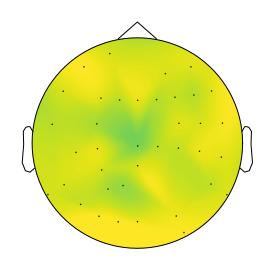

In [12]:
# Hack for selecting channels - to fix
data = bands[band][:,features[feature]]
masked_arr = mask_nan_array(data)
plot = mne.viz.plot_topomap(bands[band][:,features[feature]][masked_arr], pos[masked_arr], cmap=cm.viridis, contours=0)

In [55]:
fig = plt.figure(figsize=(1, 3))

cmap = cm.viridis
norm = mpl.colors.Normalize(vmin=bands[band][:,features[feature]].min(), vmax=bands[band][:,features[feature]].max())
cb = mpl.colorbar.ColorbarBase(plt.gca(), cmap=cmap, norm=norm, orientation='vertical')

NameError: name 'mpl' is not defined

<Figure size 72x216 with 0 Axes>

# SPATIAL CORRELATIONS: Position & Band Features

In [ ]:
# Correlations & Plots
# Average feature value at each channel
# For posterior -> anterior
# Check: left -> right
# Check: Medial -> lateral

In [61]:
dat = group_bands[band][:,features[feature]]

In [62]:
dat

array([ 1.51744925,  6.03170063,  1.03653621,  2.6882011 ,  1.36458482,
        2.41241696,  1.71994759,  1.87026367,         nan,  2.26102409,
        2.89403444,  0.5362047 ,         nan,  2.82744428,  3.99701087,
               nan,  2.85716867,  3.3403712 ,  1.88630213,         nan,
        1.84423028,  4.79710641,  3.24113225,         nan,         nan,
               nan,         nan,  1.29663444,  2.50064408,  1.59598471,
               nan,         nan, 10.99520996,  1.60272282,  1.48571247,
        5.26859079,  2.99731358,  1.54220367,  1.63661353,  3.42469812,
               nan,  0.8512408 ,  1.65528291,  2.33621067,  1.99869542,
        3.47826625,  4.07992055,  1.90142849,         nan,         nan,
               nan,         nan,  1.79259609,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,  2.00210169])

# Scatter plots


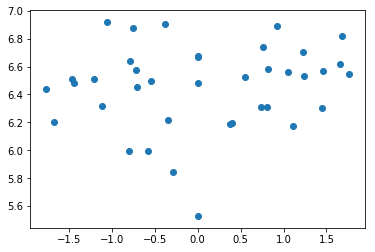

In [15]:
plt.scatter(pos[:, 0], dat)
# left to right

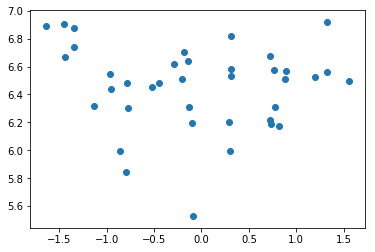

In [16]:
plt.scatter(pos[:, 1], dat)
# posterior to anterior

In [31]:
mask_nan_array??

In [37]:
def mask_nan_array(dat):
    #Masking
    bool_arr = [True] * len(dat)
    #To updated to select channels 
    for idx, bool_ind in enumerate(bool_arr):
        if math.isnan(bands[band][:,features[feature]][idx]):
            bool_arr[idx] = False
    return bool_arr

In [40]:
pearsonr(pos[:, 1], mask_nan_array(data))[0]
# (correlation value(r-value), p-value)

0.3776274563081587

In [35]:
whos

Variable          Type             Data/Info
--------------------------------------------
FOOOF             type             <class 'fooof.fit.FOOOF'>
FOOOFGroup        type             <class 'fooof.group.FOOOFGroup'>
OscDat            type             <class '__main__.OscDat'>
alpha_data        ndarray          64x3x13: 2496 elems, type `float64`, 19968 bytes
band              str              misc
bands             dict             n=4
beta_data         ndarray          64x3x13: 2496 elems, type `float64`, 19968 bytes
ch_names          list             n=65
chan_dat          str              channel_dat.txt
chan_file         str              C:\Users\abc\EEG-MNE\channel_dat.txt
cm                module           <module 'matplotlib.cm' f<...>ages\\matplotlib\\cm.py'>
columns           dict_keys        dict_keys(['CFS', 'AMPS', 'BWS'])
corr_val          float64          0.14682725436644703
dat               ndarray          64: 64 elems, type `float64`, 512 bytes
data              nd

In [ ]:
# Correlation Matrix
#  Each matrix: rows are bands, columns are FOOOF features
#    Each value is the corr value (r) between the data of that Band & Feature to a spatial dimension
#    There is a corr-matrix for each spatial dim
# Bonus: plot the matrix in colours.

In [111]:
index = bands.keys()
columns = features.keys()
df = pd.DataFrame(index=index, columns=columns)

for band in bands:
    for feature in features:
        data = bands[band][:,features[feature]]
        masked_arr = mask_nan_array(data)
        corr_val = pearsonr(pos[masked_arr, 1], data[masked_arr])[0]
        df.loc[band, feature] = corr_val
    


In [112]:
df

,CFS,AMPS,BWS
theta,-0.1007,-0.315476,0.0912894
alpha,-0.00332102,-0.386144,-0.260516
beta,0.260128,-0.262458,-0.0134561
misc,-0.1256,-0.043781,-0.00907968


## Spatial Correlations: Per Subject level

Run the same correlations as above (ex. CF per channel), per subject
Collect the distributions of R values

In [113]:
alpha_data.shape

(64, 3, 13)

In [114]:
a_cf.shape

(64, 13)

In [128]:
pos.shape

(64, 2)

In [124]:
rs = []; ps = []
a_cf = subject_bands['beta'][:,features['AMPS']]
for si in range(13):
    masked_arr = mask_nan_array(a_cf[:,si])
    rs.append(pearsonr(pos[masked_arr, 1], a_cf[:,si][masked_arr])[0])
    #print(pearsonr(pos[masked_arr, 0], a_cf[masked_arr])[0])
    #ps[si]= pearsonr(pos[masked_arr, 0], data[masked_arr])[1]

In [125]:
rs

[-0.14958870386321044,
 -0.008575676425475564,
 0.10381479440326057,
 -0.20185455926785434,
 0.14490711325615782,
 -0.27214329392419384,
 -0.4399675480164057,
 -0.29833047649322286,
 -0.037762681827077774,
 -0.31233703730494305,
 -0.03145137382254938,
 -0.18155513690930744,
 -0.3063390163156258]

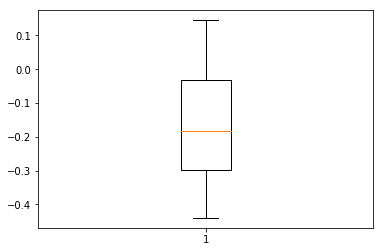

In [126]:
plt.boxplot(rs);

# Spatial Correlations Between Bands

In [ ]:
d1 = dat = bands['alpha'][:,features['AMPS']]
d2 = dat = bands['beta'][:,features['AMPS']]

In [ ]:
pearsonr(d1, d2)

In [ ]:
th = [nan, 1, 1, nan]
al  = [1.3, 1.2, 1.5, 1.4]
#make boolean array so that you ma th's 1 and 1 with al's 1.2 1.2
#onces extracted -> index position in reference to origial array doesnt matter
#if a value at index n for 